In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfx = pd.read_csv("Logistic_X_Train.csv")
dfy = pd.read_csv("Logistic_Y_Train.csv")

x_train = dfx.values
print(x_train, x_train.shape)

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 ...
 [ 0.08827657  1.63878904 -2.19364056]
 [ 1.52515501  0.85923429  1.50530791]
 [-0.97981744  0.56395376 -1.53939416]] (3000, 3)


In [3]:
y_train = dfy.values.reshape((-1,))

In [4]:
x_test = pd.read_csv("Logistic_X_Test.csv").values
print(x_test)

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]


In [5]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [6]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

In [7]:
def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
        return err/x.shape[0]   

In [8]:
def gradient(x,y,w,b):
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
    return [grad_w/x.shape[0],grad_b/x.shape[0]]

In [9]:
def gradientAscent(x,y,lrate=1):
    err_list=[]
    w=np.random.random((x.shape[1],))
    b=np.random.random()
    itr=0
    max_itr=100
    while(itr<=max_itr):
        [grad_w,grad_b]=gradient(x,y,w,b)
        e=error(x,y,w,b)
        w+=lrate*grad_w
        b+=lrate*grad_b
        err_list.append(e)
        itr+=1
    return w,b,err_list
    

In [10]:
def predict(x,w,b):    
    y_pred = []
    for i in range(x.shape[0]):
        confidence=hypothesis(x[i],w,b)
        if confidence<0.5:
            p=0
        else:
            p=1
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    return y_pred

In [11]:
w,b,err_list=gradientAscent(x_train,y_train)

Text(0.5, 1.0, 'error plot')

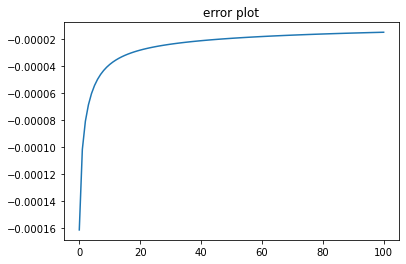

In [13]:
plt.plot(err_list)
plt.title("error plot")

In [16]:
x_test=pd.read_csv('Logistic_X_Test.csv')
x_test=x_test[['f1','f2','f3']].values
y_pred=predict(x_test,w,b)
print(y_pred)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 